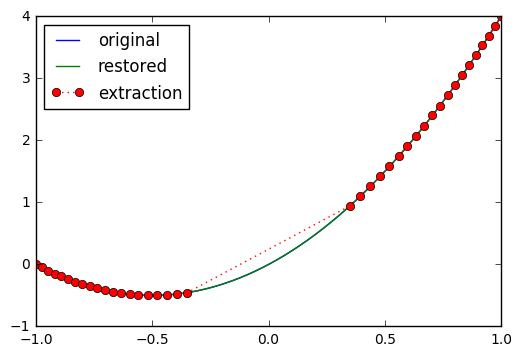

In [2]:
import numpy as np
import math
import random
from numpy.polynomial import Chebyshev as T
from numpy import polynomial as P
import matplotlib.pyplot as plt
%matplotlib inline

# init
# number of grid points
n = 801
# Chebyshev polynomial power
m = 40

# main domain
x = np.linspace(-1, 1, n)
y = np.zeros(n, dtype=float)

# extraction domain
x_t = np.zeros(m, dtype=float)
y_t = np.zeros(m, dtype=float)

# Cheb polynomials matrix
T_t = np.zeros((m, m) ,dtype=float)

# restoring test domain
y_restored = np.zeros(n, dtype=float)

# function 
y = 2*x + 2*(x ** 2)
   
# uniform extraction
# forming extraction domains and Cheb matrices
i = 0
while i < m:
    point = i*math.floor(n/m)
    x_t[i] = x[point]
    y_t[i] = y[point]
    j = 0
    while j < m:
        T_t[i][j] = T.basis(j)(x_t[i])
        j = j + 1
    i = i + 1


C = np.linalg.solve(T_t, y_t)
#print ('Coefficients=', C)

# restoring function on whole domain
i = 0
while i < n:
    j = 0
    summ = 0.0
    while j < m:
        summ = summ + C[j]*T.basis(j)(x[i])
        j = j + 1
    y_restored[i] = summ
    i = i + 1

    
#plt.plot(x, y_restored)
#plt.legend(['original', 'restored'], loc='lower left')
#plt.show()    

#extraction with weights
i = 0
extr_point_back = 0
extr_point_front = n - 1
while i < (m / 2):
    x_t[i] = x[extr_point_back]
    y_t[i] = y[extr_point_back]
    x_t[m - 1 - i] = x[extr_point_front]
    y_t[m - 1 - i] = y[extr_point_front]
    jump = math.ceil(((n-1) / m) * (1 / (1 + (x[extr_point_back]) ** 2)))
    extr_point_back += jump
    extr_point_front -= jump
    j = 0
    while j < m:
        T_t[i][j] = T.basis(j)(x_t[i])
        T_t[m - 1 - i][j] = T.basis(j)(x_t[m - 1 - i])
        j = j + 1
    i = i + 1
      

C = np.linalg.solve(T_t, y_t)
#print ('Coefficients=', C)

# restoring function on whole domain
i = 0
while i < n:
    j = 0
    summ = 0.0
    while j < m:
        summ = summ + C[j]*T.basis(j)(x[i])
        j = j + 1
    y_restored[i] = summ
    i = i + 1

    
plt.plot(x, y)    
plt.plot(x, y_restored)
plt.plot(x_t, y_t, linestyle = ':', marker = 'o')
plt.legend(['original', 'restored', 'extraction'], loc='upper left')